# Self-study try-it activity 2.1: Using Python to handle missing values

In data analysis, missing values can be both obstacles to insight and clues to deeper patterns. Like detectives piecing together evidence, data scientists must explore data sets to identify, understand and strategically address these gaps.

## 1. Detecting missing values

The first step in handling missing values is to detect them. Let’s explore different methods for identifying missing values in `arrays`, `series` and `DataFrames`. 

- Boolean masking of missing values using Pandas

- Counting missing values

- Visualising missing data

- Checking missing values in `arrays`

- Detecting missing values in `series`

Let's explore the first method.

### a. Boolean masking of missing values using `Pandas`.

The methods `isnull()` and `notnull()` are used to create Boolean masks for missing values. `isnull()` returns `True` for missing values and `False` otherwise, while `notnull()` does the opposite.

In [7]:
import pandas as pd
import numpy as np

#Create a DataFrame with missing values
df = pd.DataFrame({'A': [1, 2, None, 4], 'B': [None, 2, 3, None]})

#Detect missing values using isnull() and notnull()

print(df.isnull())
print(df.notnull())



       A      B
0  False   True
1  False  False
2   True  False
3  False   True
       A      B
0   True  False
1   True   True
2  False   True
3   True  False


### b. Counting missing values

The missing values in a data set are counted using the `.sum()` method.

In [6]:
missing_count = df.isnull().sum()

#Compute the missing count
print(missing_count)

A    1
B    2
dtype: int64


### c. Visualising missing data

Seaborn is a Python library built on top of Matplotlib, designed to simplify the creation of visually appealing and informative statistical graphics. It integrates seamlessly with pandas `DataFrames`to support data analysis and visualisation.

One useful plot type is the heatmap, a graphical representation in which individual values are displayed as colour gradients. Heatmaps are especially helpful for visualising missing data, correlations or any matrix-like data sets.

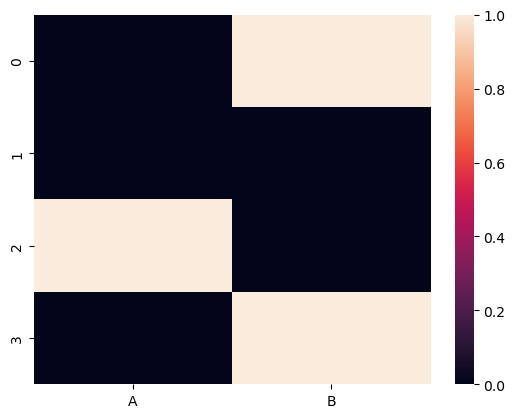

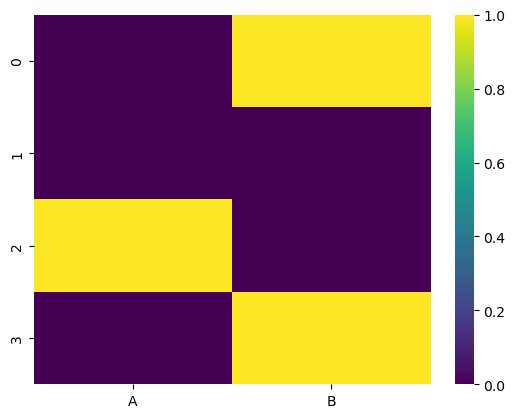

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull())
plt.show()
#Display the heatmap with cbar=True, cmap="viridis". What change do you observe?

sns.heatmap(df.isnull(), cbar=True, cmap="viridis")
plt.show()



### d. Checking missing values in `arrays`

Use NumPy’s `isnan()` function to detect missing values in `arrays`.

In [ ]:
#Declare an array with missing values and display the presence of null values in the array
array1 = np.array([1, 2, np.nan, 4])
array2 = np.array([1, 2, 3, 4])

print (np.isnan(array1).any())
print (np.isnan(array2).any())


True
False


### e. Detecting missing values in `series`

Use pandas' `isna()` function to detect `NaN` values.

In [25]:
series = None
series = pd.Series([1, None, 3, np.nan])

#Display the missing values in the series.

series.isna()

0    False
1     True
2    False
3     True
dtype: bool

## 2. Removing missing values

After detecting missing values in Python, one common approach is to remove them, especially when the missing data is minimal or when it cannot be reasonably imputed. 

The different ways of removal rows and/or column(s) with missing values are:

- Removing rows with missing values

- Removing columns with missing values

- Removing rows or columns based on a threshold

- Removing rows where all values are missing

- Removing columns where all values are missing

In [33]:
#Removing rows with missing values
#When df.dropna() is used, it removes rows in which any column has a missing value.
data = {'A': [1, 2, np.nan, 4], 'B': [5, np.nan, 7, 8], 'C': [9, 10, 11, np.nan]}
df = pd.DataFrame(data)
df_cleaned =df.dropna()

print (df)
print ('---\n')

print (df_cleaned)
print ('---\n')

#Explain why df.dropna() returns only one row (index 0) for this data set.
#How would the outcome change if only one row had no missing values?

data1 = {'A': [1, 2, 3, 4], 'B': [5, np.nan, 7, 8], 'C': [9, 10, 11, 12]}
df1 = pd.DataFrame(data1)
df_cleaned1 =df1.dropna()

print (df1)
print ('---\n')

print (df_cleaned1)
print ('---\n')



     A    B     C
0  1.0  5.0   9.0
1  2.0  NaN  10.0
2  NaN  7.0  11.0
3  4.0  8.0   NaN
---

     A    B    C
0  1.0  5.0  9.0
---

   A    B   C
0  1  5.0   9
1  2  NaN  10
2  3  7.0  11
3  4  8.0  12
---

   A    B   C
0  1  5.0   9
2  3  7.0  11
3  4  8.0  12
---



In [35]:
#Removing columns with missing values
#If entire columns contain many missing values, they can be dropped using dropna(axis=1).
df_cleaned_columns = df.dropna(axis = 1)

print (df)
print ('---\n')

print (df_cleaned_columns)
print ('---\n')


#Explain why df.dropna(axis=1) results in a DataFrame with no columns for the given data set.
#How would the outcome change if one column had no missing values?

df_cleaned_columns1 = df1.dropna(axis = 1)
print (df_cleaned_columns1)
print ('---\n')



     A    B     C
0  1.0  5.0   9.0
1  2.0  NaN  10.0
2  NaN  7.0  11.0
3  4.0  8.0   NaN
---

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]
---

   A   C
0  1   9
1  2  10
2  3  11
3  4  12
---



In [49]:
#Removing rows/columns based on threshold
#The threshold for the minimum number of non-missing values required in a row or column can be specified using the `thresh` parameter.
df_cleaned_threshold = None
df_cleaned_threshold = df.dropna(thresh=2)
print(df_cleaned_threshold)
#Comment on what happens when `thresh=3`. Give your reasoning.

# df.dropna(thresh=2) keeps only the rows that have at least 2 non-missing
# so everythin is basically kept

#      A    B     C
# 0  1.0  5.0   9.0
# 1  2.0  NaN  10.0
# 2  NaN  7.0  11.0
# 3  4.0  8.0   NaN

# df.dropna(thresh=3) keeps only the rows that have at least 3 non-missing
# so only the first row stays

df_cleaned_threshold = df.dropna(thresh=3)
print(df_cleaned_threshold)

#      A    B    C
# 0  1.0  5.0  9.0

     A    B     C
0  1.0  5.0   9.0
1  2.0  NaN  10.0
2  NaN  7.0  11.0
3  4.0  8.0   NaN
     A    B    C
0  1.0  5.0  9.0


In [56]:
#Removing rows where all values are missing
#To remove rows where all columns are missing, use how='all'
df_cleaned_all = df.dropna(how='all')

print (df_cleaned_all)

df2 = pd.DataFrame(
     {'A': [1, np.nan, 3, 4], 'B': [5, np.nan, 7, 8], 'C': [9, np.nan, 11, 12]}
)

print (df2)
print (df2.dropna(how='all'))

#Explain the difference between using how='any' and how='all' in dropna()

# Any removes rows whit at least one not a number, wwhilst all remove only rowws where all values are NaN


     A    B     C
0  1.0  5.0   9.0
1  2.0  NaN  10.0
2  NaN  7.0  11.0
3  4.0  8.0   NaN
     A    B     C
0  1.0  5.0   9.0
1  NaN  NaN   NaN
2  3.0  7.0  11.0
3  4.0  8.0  12.0
     A    B     C
0  1.0  5.0   9.0
2  3.0  7.0  11.0
3  4.0  8.0  12.0


In [ ]:
#Removing columns where all values are missing
# Columns where all entries are missing can be dropped by setting axis=1 and how='all'
df_all_nan_columns_removed = None

df3 = pd.DataFrame(
     {'A': [np.nan, np.nan, np.nan, np.nan], 'B': [5, 6, 7, 8], 'C': [9, 10, 11, 12]}
)

print (df3)

print (df3.dropna(axis=1, how='all'))

#Explain the scenarios in which you would use dropna(axis=1, how='all') to remove columns
#Provide examples of when this approach is beneficial for data preprocessing

# very large dataset with no precise temporal alignment


    A  B   C
0 NaN  5   9
1 NaN  6  10
2 NaN  7  11
3 NaN  8  12
   B   C
0  5   9
1  6  10
2  7  11
3  8  12


## 3. Imputing missing values

Imputing missing values involves replacing `NaN` or missing entries in a data set with appropriate values to ensure the data set remains usable for analysis or modelling. Imputing can be performed in a variety of ways, such as:

- Imputing with the mean or the median

- Imputing with the mode

- Imputing with the constant value

- Imputing with `SimpleImputer`

- Predictive imputation

### a. Imputing with the mean or the median

Imputing with the mean is a common technique for numerical data, where the mean of the column replaces missing values. This approach is suitable when the proportion of missing data is small and the mean does not significantly distort the overall distribution.

Imputing with the median is a better choice when the data contains outliers that could skew the mean, as the median is less sensitive to extreme values and provides a more robust estimate.

In [ ]:
df = pd.DataFrame({'A': [1, 2, np.nan, 4], 'B': [5, np.nan, 7, 8], 'C':[156,200,np.nan,5]})
df_imputed_mean = df.fillna(df.mean(), inplace=True)
df_imputed_median = df.fillna(df.median(), inplace=True)

print (df_imputed_mean)
print (df_imputed_median)

#Compare the results of using mean() and median() for imputation. How do the imputed values differ, and what might cause these differences?
#With the addition of column 'C' containing values [156, 200, np.nan, 5],
#Explain why you would prefer to use either mean() or median() for imputation. Consider the impact of outliers on your choice."


### b. Imputing with the mode

You can use the mode to impute the missing values for categorical data, when the missing values are replaced with the mode (the most frequent value).

In [ ]:
df = pd.DataFrame({'Category': ['A', 'B', np.nan, 'A', 'C', np.nan]})

# Impute missing values with mode
df_new = None

#Compare the count of 'A' in the original DataFrame and in df_new
#How does imputing missing values with the mode affect the frequency of 'A'?

### c. Imputing with the constant value

Use this method when you want to assign a default value to indicate the missing data explicitly.

In [ ]:
# Replace NaN in numerical column with a constant value (e.g. -1)
df = pd.DataFrame({'A': [1, 2, np.nan, 4], 'B': [5, np.nan, 7, 8]})
#df_constant = None

#What happens when you replace missing values (NaN) in a numerical column with a constant value like 10?
#Compare the original DataFrame and the resulting DataFrame after imputation
#How might this approach affect subsequent data analysis or modelling

### d. Imputing with `SimpleImputer`

`SimpleImputer` is a class in the `scikit-learn` library used to handle missing values in data sets by replacing them with specific imputed values. It provides a systematic way to fill in missing data using strategies like mean, median, most frequent value (mode) or constant value. It works seamlessly with machine learning pipelines.

In [ ]:
from sklearn.impute import SimpleImputer

#Create a DataFrame with missing values
df = pd.DataFrame({'Age': [25, 30, np.nan, 35], 'Salary': [50000, np.nan, 60000, 65000]})

#Instantiate SimpleImputer with strategy='mean'
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

#Apply imputation
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("Original DataFrame:")
print(df)
print("\nDataFrame After Imputation:")
print(df_imputed)
#Use strategy='median' and compare the difference between the mean imputer and median imputer

### e. Predictive imputation

Predictive imputation is a common technique for handling missing data in large data sets. Using machine learning models to estimate missing values based on feature relationships ensures data integrity and improves downstream analysis accuracy. However, it requires careful model selection and computational resources to handle large-scale data effectively.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

#Create a DataFrame with missing values
df = pd.DataFrame({
    'Age': [25, 30, np.nan, 35],
    'Salary': [50000, np.nan, 60000, 65000],
    'Experience': [2, 5, 7, np.nan]
})

print("Original DataFrame:")
print(df)

#Separate rows with and without missing values for the 'Salary' column
train_data = df[df['Salary'].notnull()]
test_data = df[df['Salary'].isnull()]

#Train a regression model to predict 'Salary' based on other columns
model = LinearRegression()
X_train = train_data[['Age', 'Experience']].fillna(0)  # Fill NaNs in predictors temporarily
y_train = train_data['Salary']
model.fit(X_train, y_train)

#Predict missing 'Salary' values
X_test = test_data[['Age', 'Experience']].fillna(0)
predicted_salary = model.predict(X_test)

#Impute the predicted values into the original DataFrame
df.loc[df['Salary'].isnull(), 'Salary'] = predicted_salary

print("\nDataFrame After Predictive Imputation:")
print(df)
#Modify the code to use predictive imputation for imputing missing values in the Age column.
#Use Salary and Experience as predictors.
#Compare the results with the original imputation of Salary.